# Part 1: Exploratory Data Analysis(EDA)

## 1.1. Analysis of the features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kubig/2024_SPRING_Kaggle/Week1_BinaryClassification_L1/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() # 총 Null value의 개수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 변수에 null value가 있음을 확인할 수 있다.

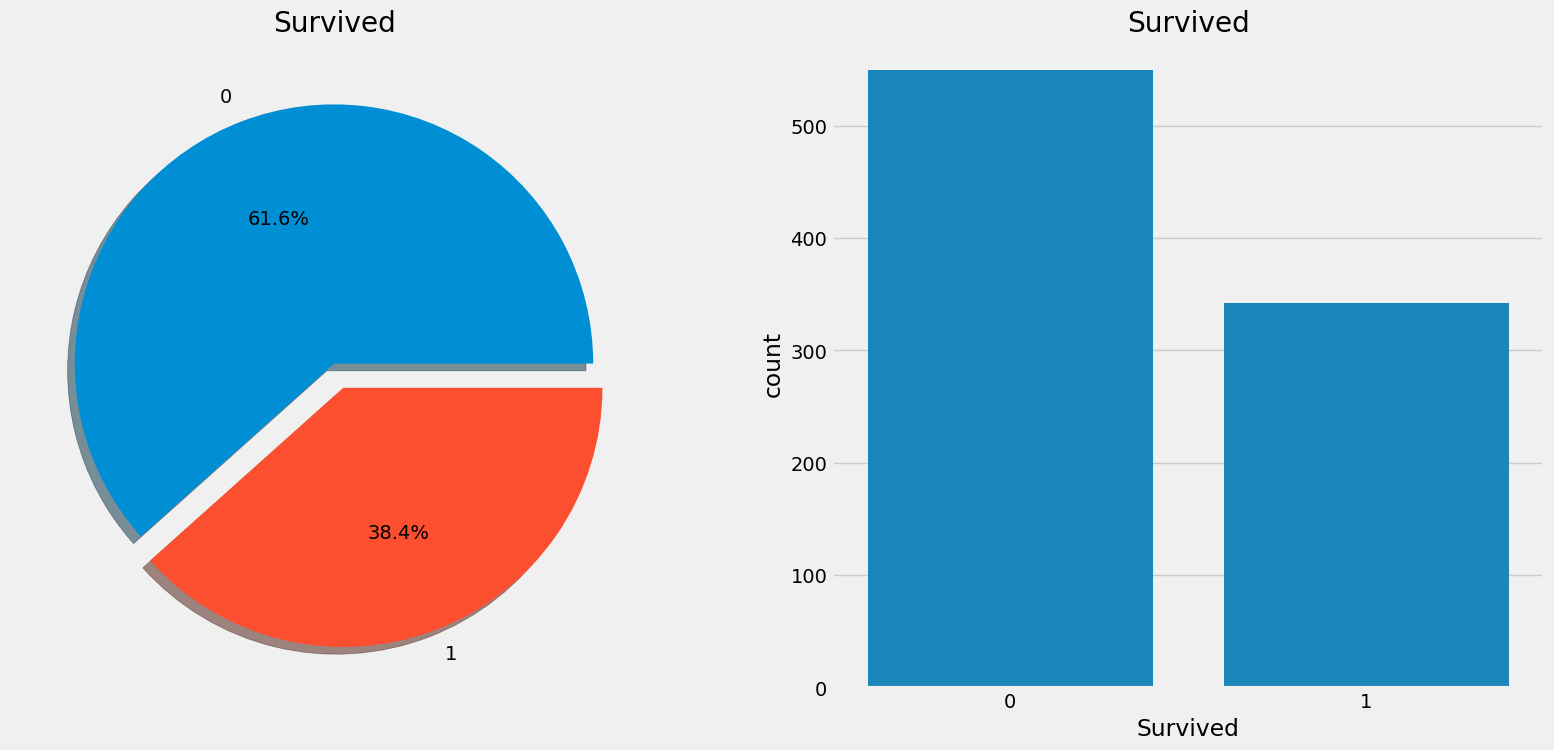

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=data, x=data['Survived'], ax=ax[1])
ax[1].set_title('Survived')
plt.show()

승객 중 약 38.4%, 즉 350명 정도만이 생존하였다.

이제 데이터셋의 feature에 따라 생존률이 어떻게 변하는지를 살펴보자. Feature의 종류에 따라 다음과 같이 분류할 수 있다.
- Categorical Feature: Sex(성별), Embarked(승선한 항)
- Ordinal Feature: PClass(객실 등급)
- Continuous Feature: Age(나이)

### Sex (Categorical)

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

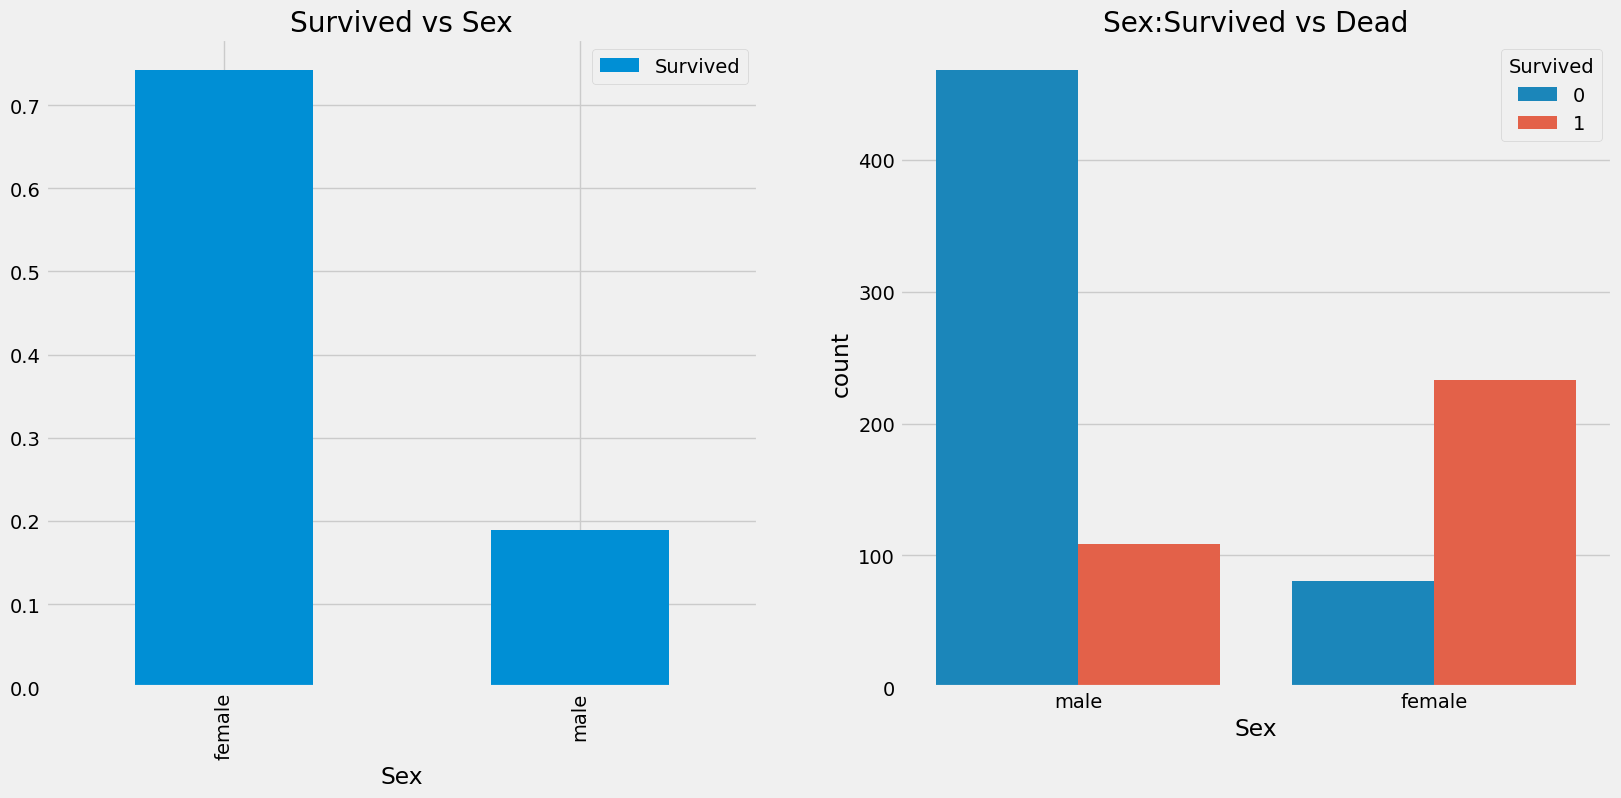

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

승선한 총 남성이 수가 여성의 수보다 월등히 많음에도 불구하고 생존한 여성의 수가 생존한 남성의 수의 두 배이다. 여성의 생존률은 75% 가량인 반면 남성의 생존률은 20%가 안되게 현저히 낮음을 확인할 수 있다.

### Pclass (Ordinal)

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


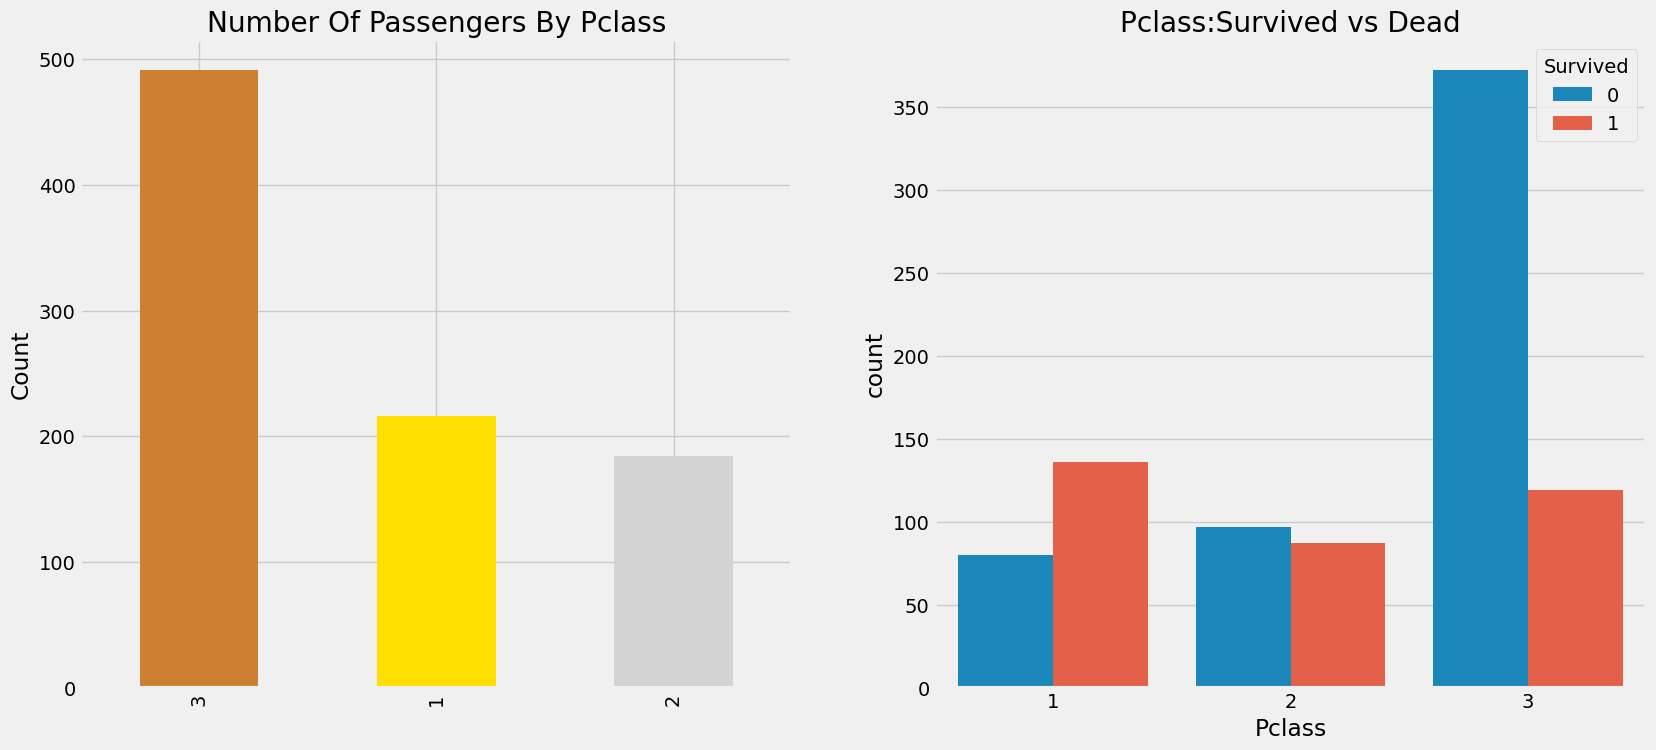

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 3등칸의 승객 수가 다른 두 칸에 비해 월등히 많았으나, 생존률은 25% 정도로 굉장히 낮았음.
- 이와 반대로 1등칸은 생존한 사람이 사망한 사람의 거의 2배로 비교적 높은 생존율을 보였다.
- 높은 등급의 칸의 승객이 더 먼저 구조되었으며, Pclass가 생존에 큰 영향을 미쳤음을 확인할 수 있다.

### Sex and Pclass

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

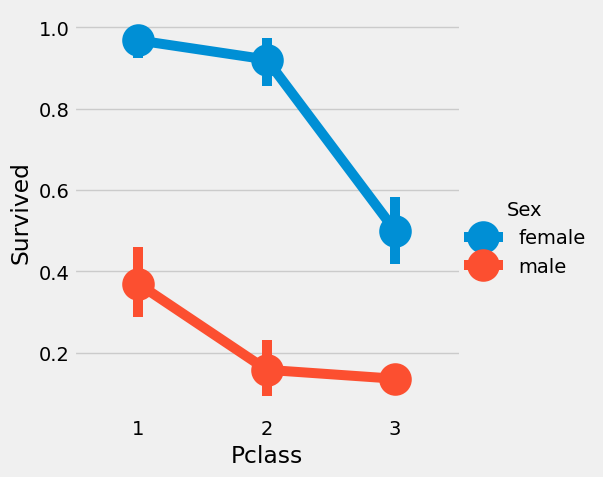

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind = 'point')
plt.show()

- Pclass1의 여성의 생존률은 95-96%로 가장 높음
- Pclass와 관계없이 여성이 우선적으로 구조되었음을 확인할 수 있음. Pclass1의 남성의 생존률이 Pclass3의 여성의 생존률보다도 낮음.

### Age (Continuous)

In [ ]:
print('Oldest Passenger was of : ', data['Age'].max(), 'Years')
print('Youngest Passenger was of : ', data['Age'].min(), 'Years')
print('Average Age on the ship was : ', data['Age'].mean(), 'Years')

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the ship was :  29.69911764705882 Years


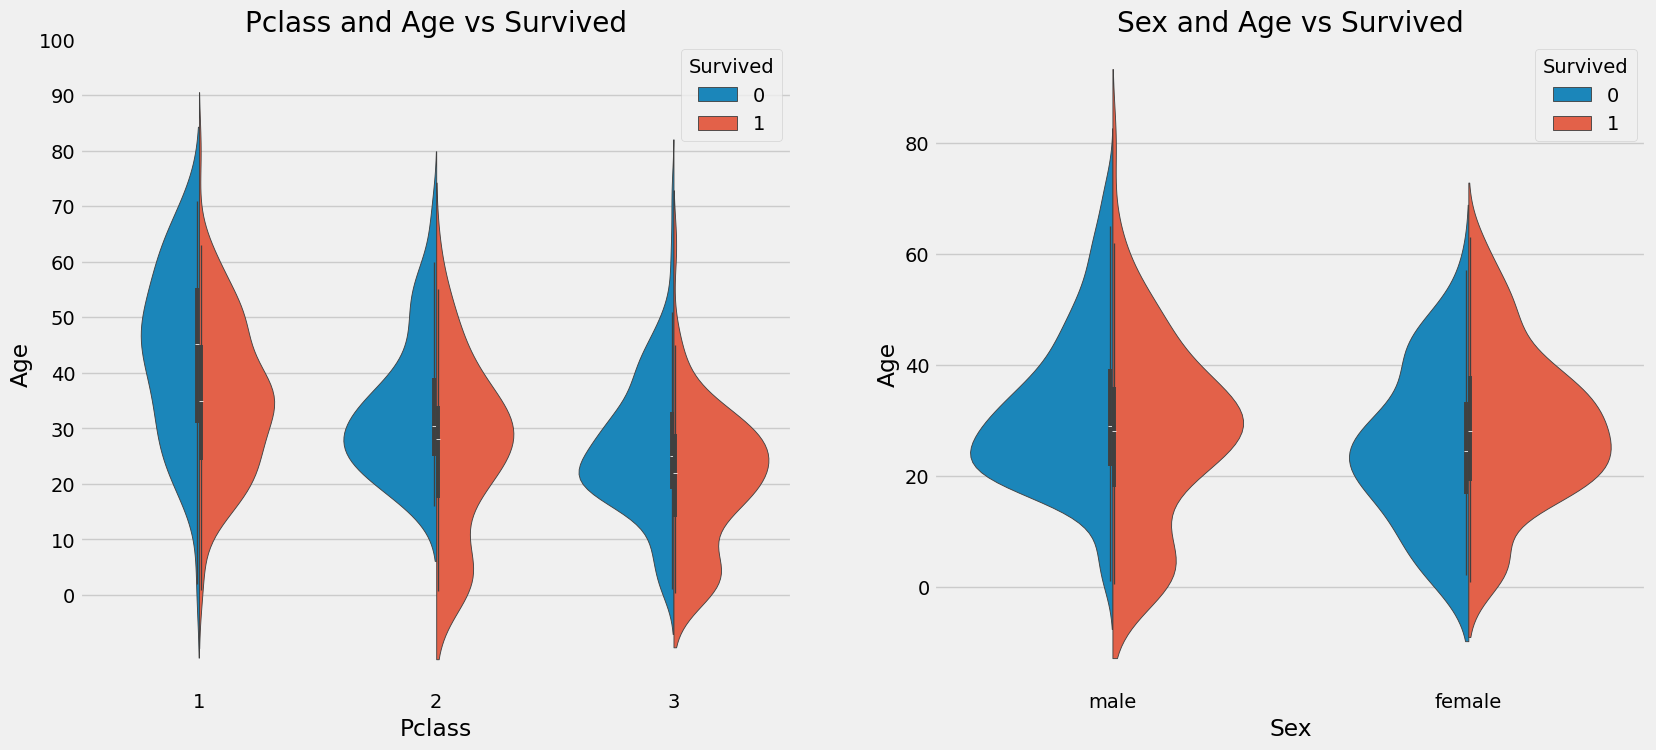

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
plt.show()

- Pclass에 따라 아이들의 수도 증가하며, 10세 이하의 어린이에 대한 생존률은 Pclass와 관계없이 높은 편이다.
- Pclass1의 20-50세의 생존률은 높으며, 여성의 경우 더 높다.
- 남자의 경우 나이가 많을수록 생존률을 낮아진다.

### Age 결측값 처리

In [ ]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Filling NaN Ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [ ]:
data.Age.isnull().any()

False

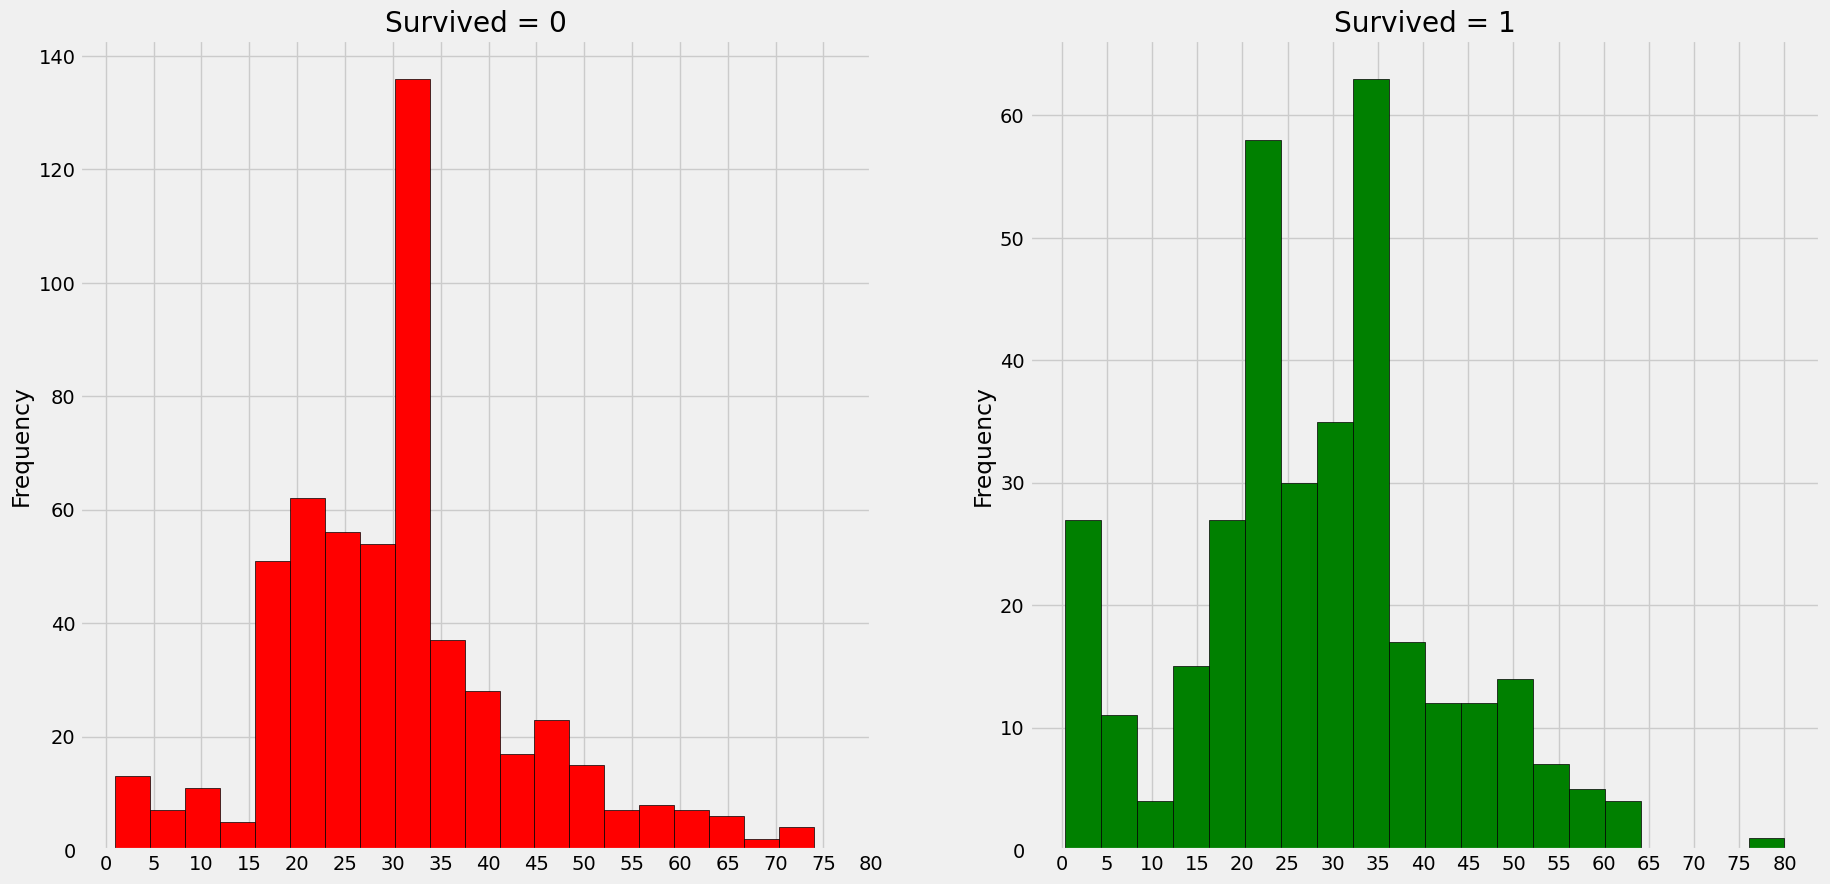

In [ ]:
f,ax=plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 5세 미만의 아이들은 Women and Children First Policy에 의해 많이 구조되었다.
- 가장 나이가 많은 승객은 구조되었다. (80세)
- 30-40세 사이의 죽음이 가장 많았다.

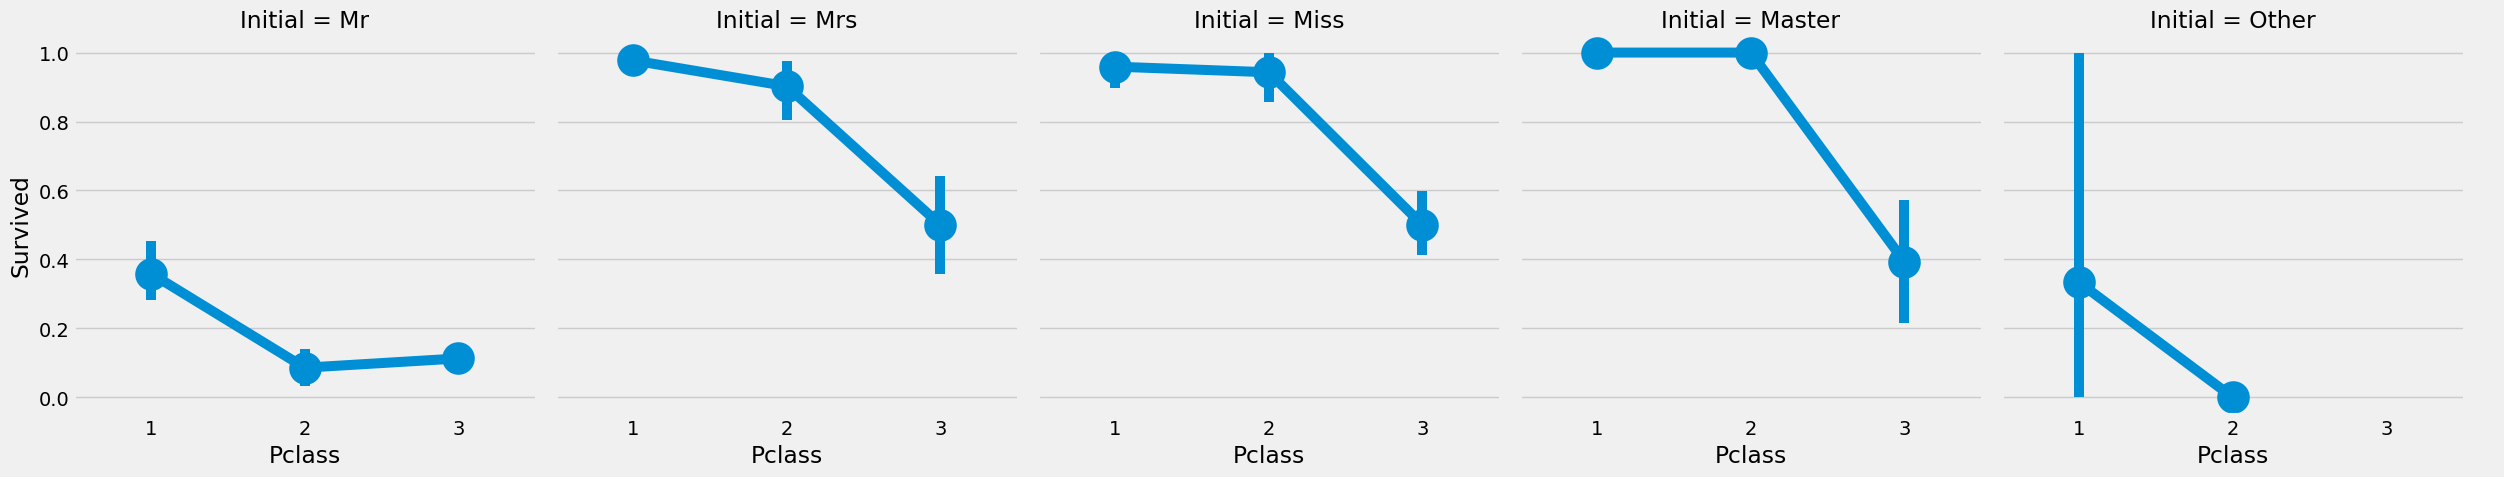

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind = 'point')
plt.show()

- Pclass와 관계 없이 Women and Child first policy가 적용되었음을 확인할 수 있다.

### Embarked (Categorical)

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

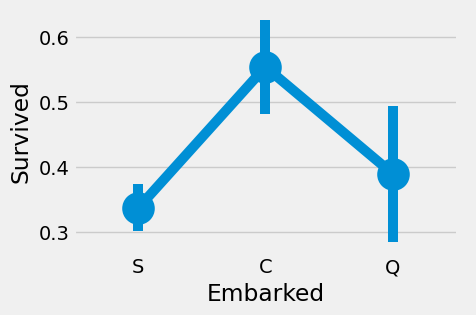

In [ ]:
sns.catplot(x='Embarked', y='Survived', data=data, kind = 'point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Port C의 생존률이 55% 정도로 가장 높고 S의 생존률이 가장 낮다.

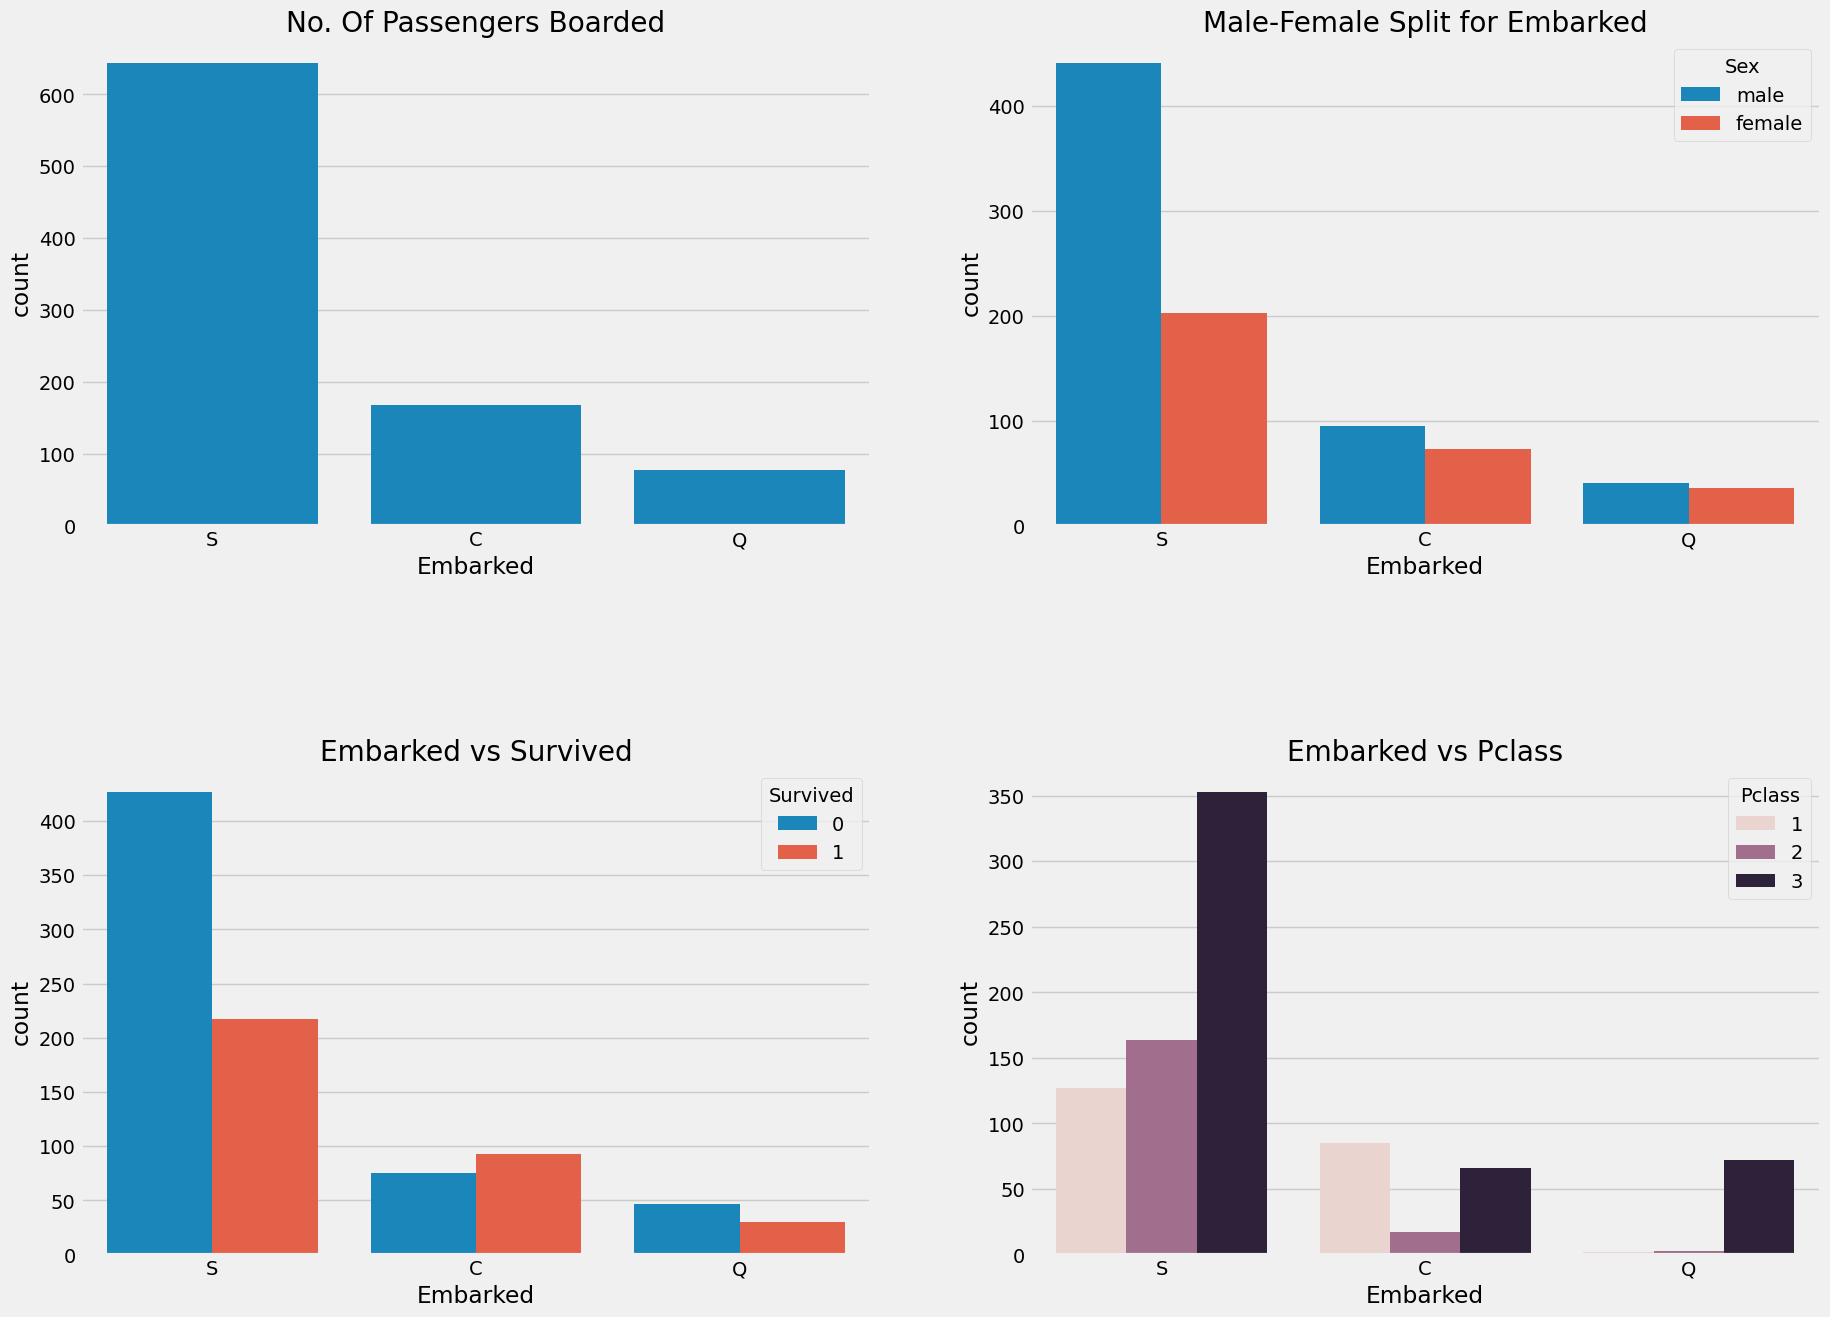

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- S에서 가장 많은 승객들이 탑승했고, 그 중 대다수가 Pclass 3에 속하였다.
- C 항구의 승객들의 생존률이 꽤 높았는데, P class 1,2에 속한 승객의 비율이 높기 때문이라 추정할 수 있다.
- 많은 부유한 승객들이 S에서 승선했지만, Pclass3의 생존률이 19%에 불과했기에 S 승선 승객들의 생존률이 낮다.
- Q에서 탑승한 승객들은 거의 다 Pclass 3에 속하였다.

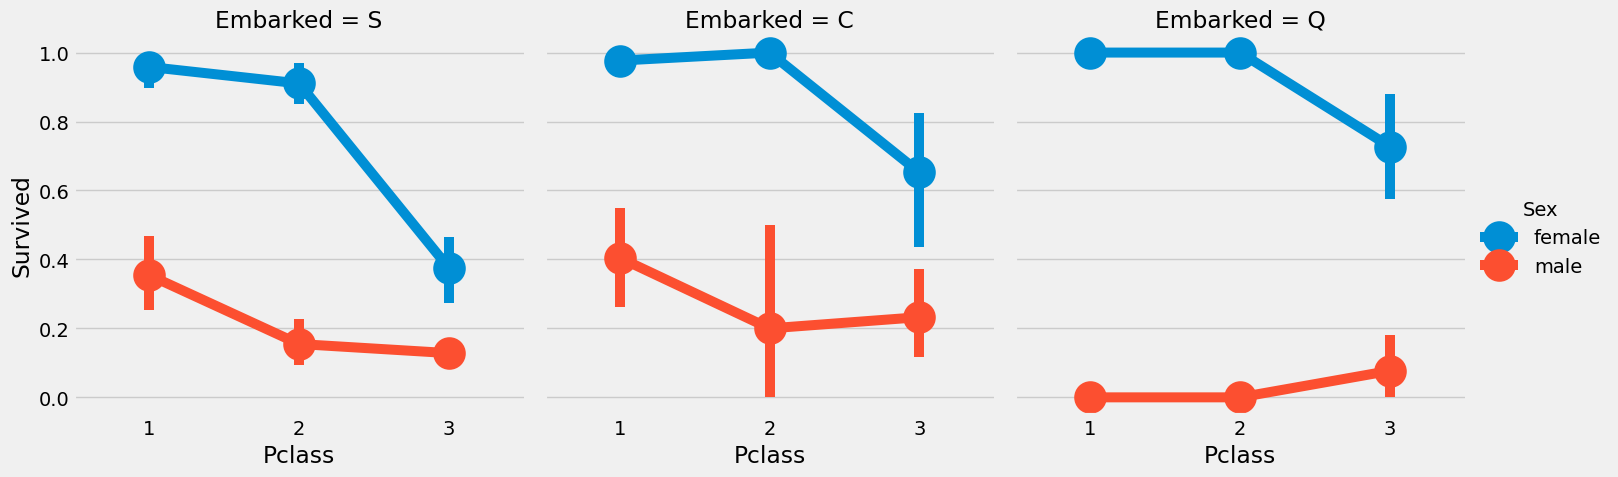

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

- S와 Q 승선 승객들 중 Pclass 3, 남성 승객들의 생존률이 매우 낮았다.
- Port S에서는 Pclass3 여성 남성 모두에 대해 생존률이 매우 낮다. 구조에 있어 경제적인 계층이 많은 영향을 미쳤다.
- Pclass 1과 2의 여성의 생존률은 항구와 무관하게 높았다.


### Embarked 결측값 처리

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.Embarked.isnull().any()

False

### SibSip (Discrete)

In [ ]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


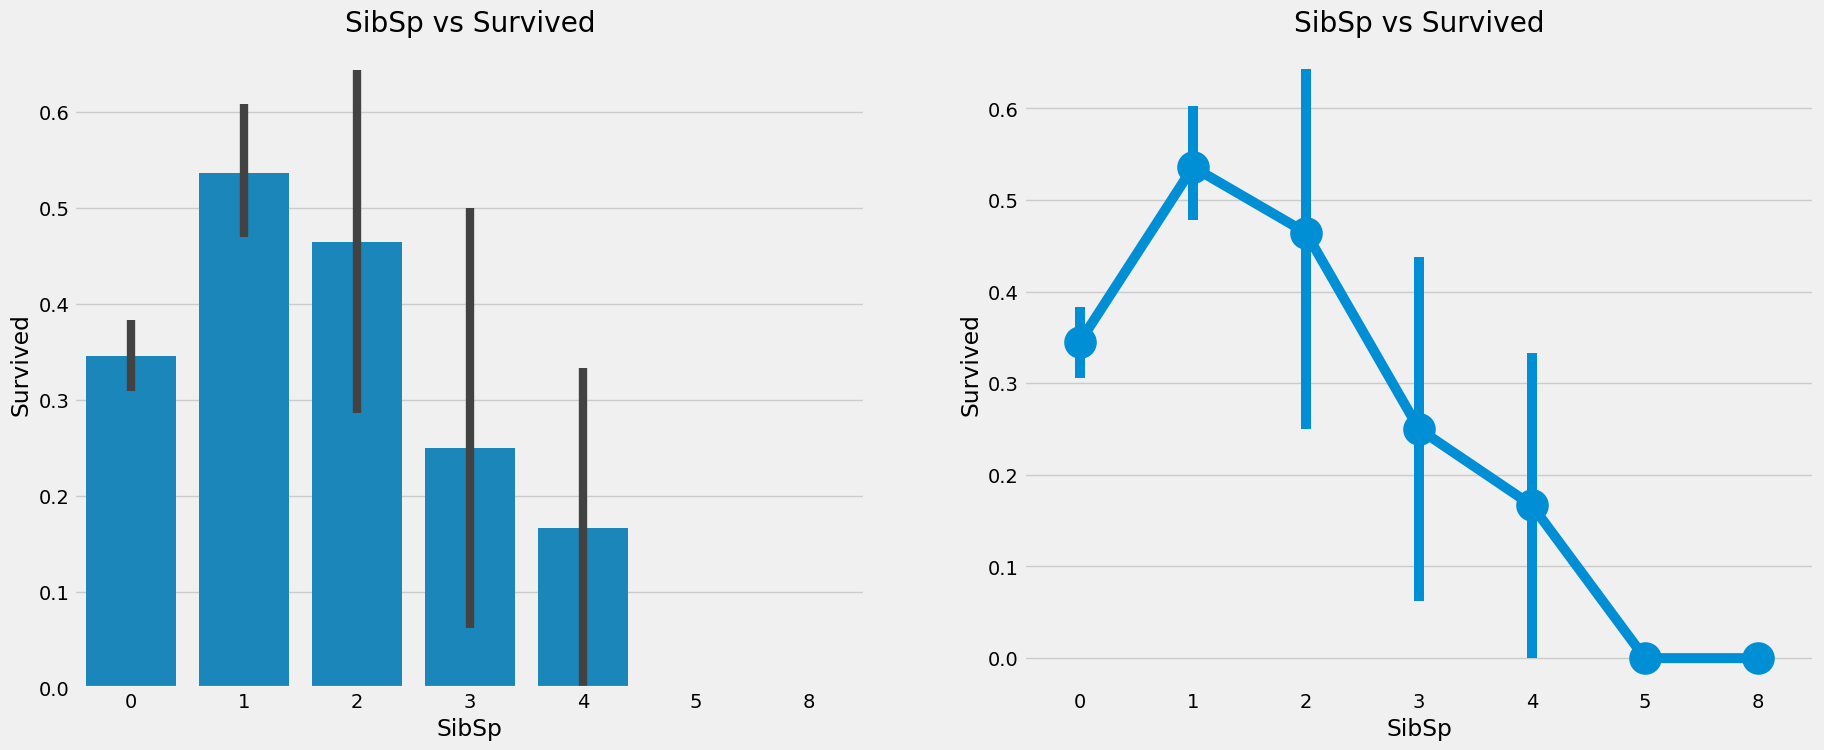

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 함께 탑승한 형제자매/배우자가 없는 탑승객의 생존률은 34% 정도였고, 그 수가 늘어날 수록 생존률이 급격히 낮아진다.
- 5-8 명의 형제자매/배우자를 가진 승객의 생존률은 0%이나, 모두 Pclass 3에 속하기에 낮은 생존률의 원인은 Pclass 때문이라 추측할 수 있다.

### Parch

In [ ]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


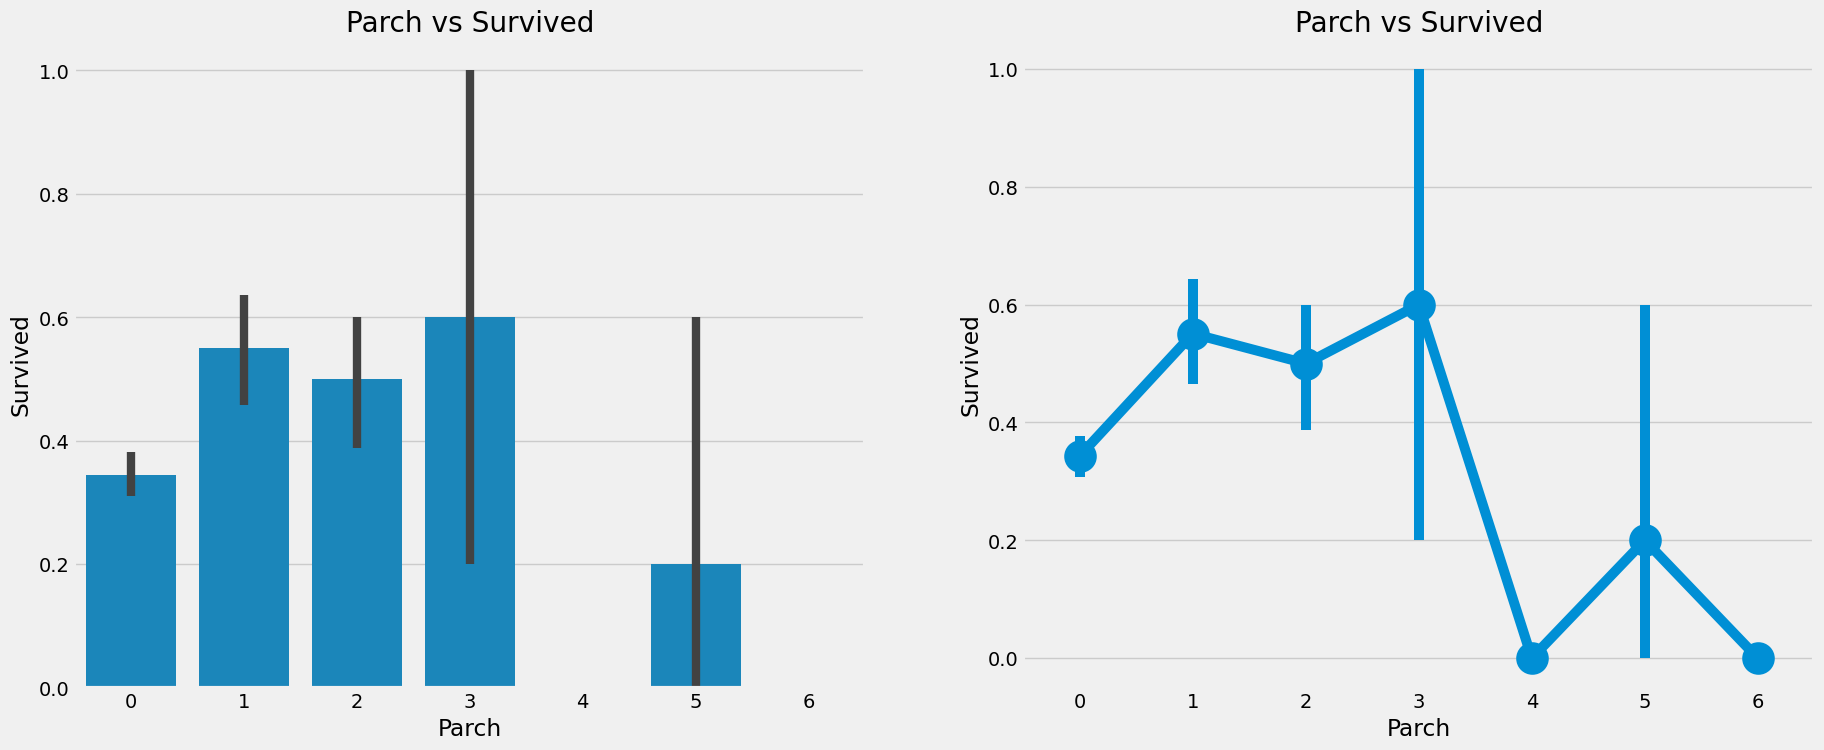

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 마찬가지로 부모/자식의 수가 더 많을수록 생존률이 낮아지는 추세를 보인다.
- 다만 1-3명의 부모/자식과 함께 승선한 승객의 생존률은 50% 이상으로 비교적 높은 편이다.

### Fare (Continuous)

In [ ]:
print('Highest Fare was : ', data.Fare.max())
print('Lowest Fare was : ', data.Fare.min())
print('Average Fare was : ', data.Fare.mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


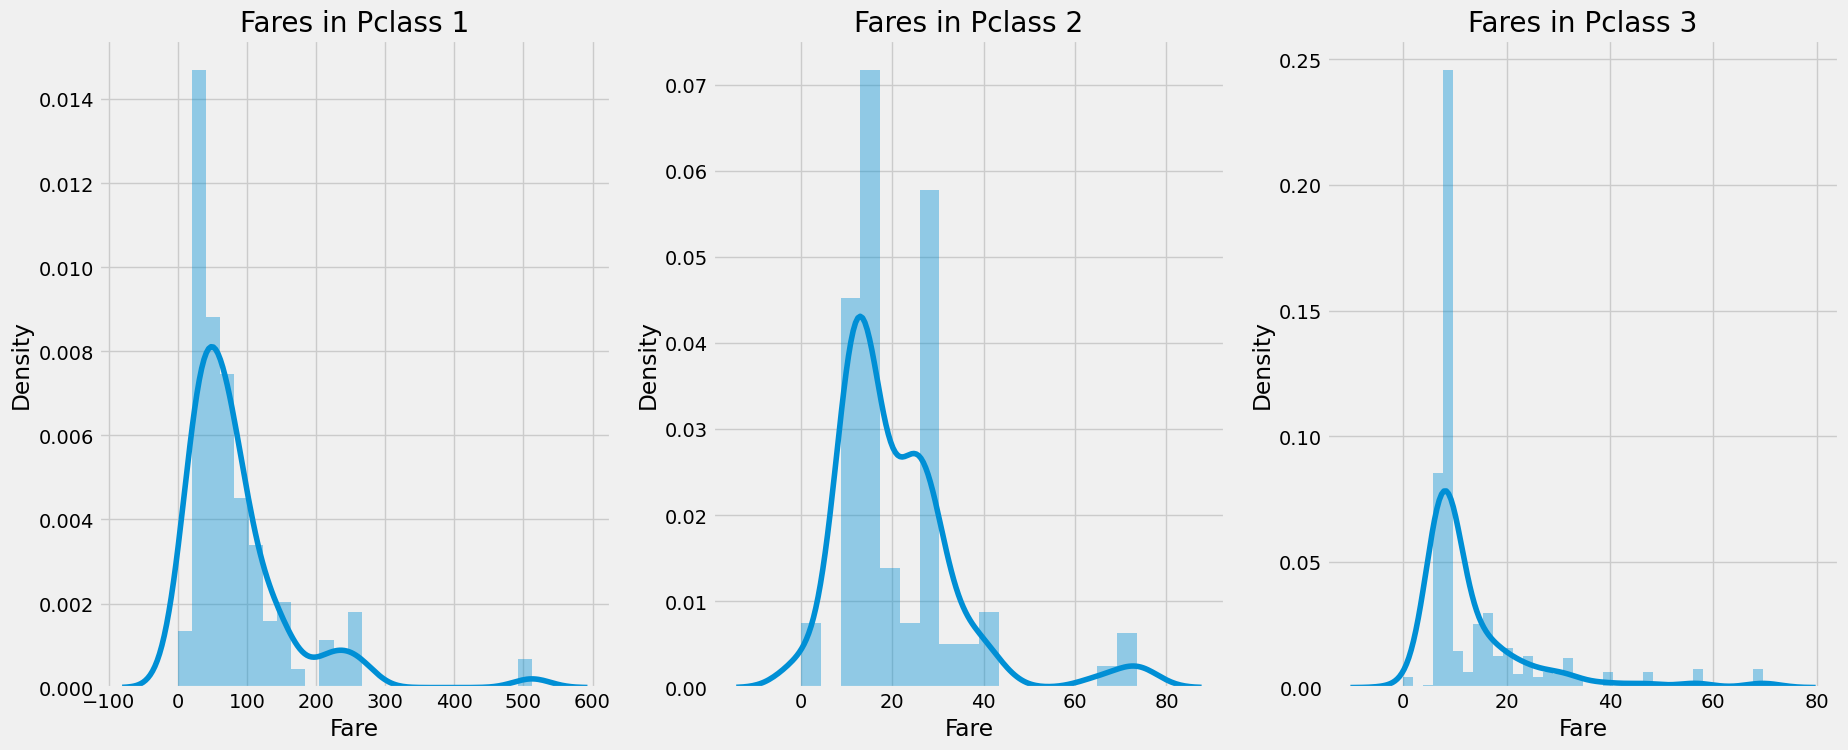

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Pclass1에서는 운임이 넓게 분포되어 있다. Class 2, 3으로 갈수록 그 분포가 좁아진다.

### Summary

- Sex: 여성이 남성보다 생존률이 높다.
- Pclass: 더 높은 등급의 칸에 속할수록 생존률이 높아진다. 특히 1등칸, 2등칸의 여성 승객들의 생존률이 매우 높다.
- Age: 5-10세 사이의 아이들의 생존률이 높고, 15-35세 사이의 사람들의 생존률은 낮다.
- Embarked: C 항구에 3등칸 승객의 수가 꽤 많았음에도 생존률이 가장 높다. S 항구에서 1등칸 승객이 가장 많이 탑승했는데도 불구하고. Q 항구의 승객들은 모두 3등칸이었다.
- Parch+SibSp: 1-2명의 형제자매/배우자나 1-3 부모/자식과 동승하는 것이 혼자/대가족과 탑승하는 것보다 생존률이 높았다.

## 1.2. Correlation Between The Features

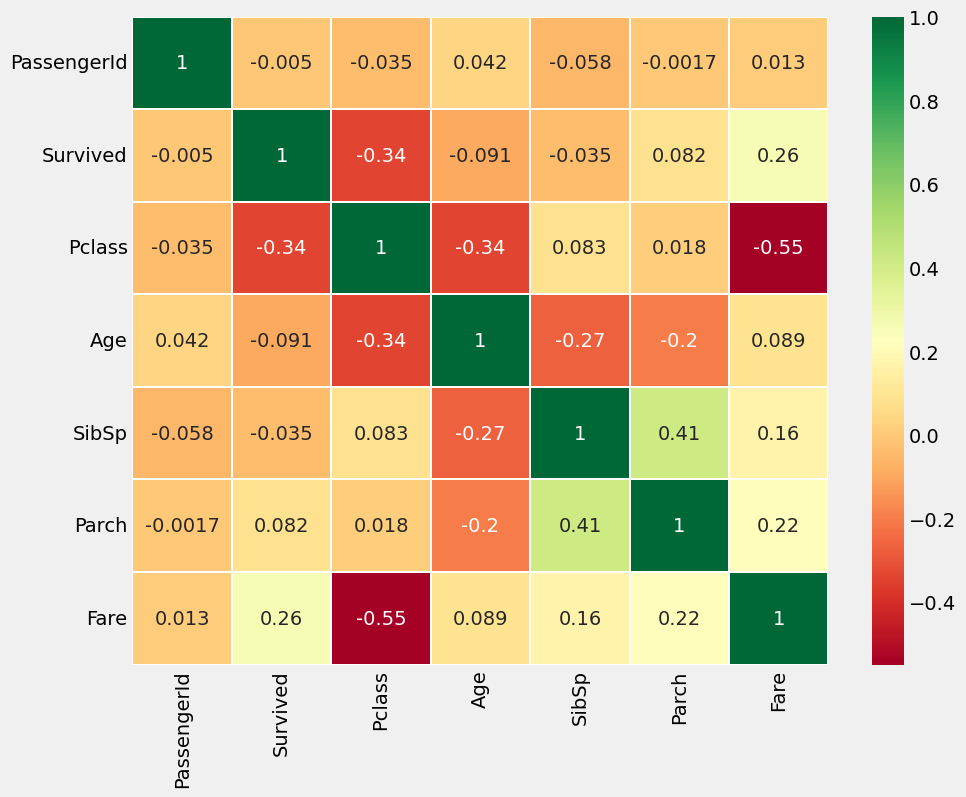

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Heatmap 해석:
SibSp와 Parch 변수가 0.41로 가장 높은 야의 상관관계를 보였다. 전반적으로 변수들 간 상관관계가 크지 않아 변수의 제거 없이 모델링을 진행할 수 있다.

**Fare과 Pclass의 음의 상관관계가 -0.55인데, 이는 고려하지 않아도 될까? 강한 상관관계(co>0.7)이 아니라 괜찮나?**

# Part 2: Feature Engineering and Data Cleaning

## 2.1. Making New Features

### Age_band

머신러닝 모델에서 연속형 변수를 사용하기는 어려우므로 age를 age_band로 바꾸어준다. 이 때 0-80세를 16 크기의 5개의 범주로 나눈다.

In [ ]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


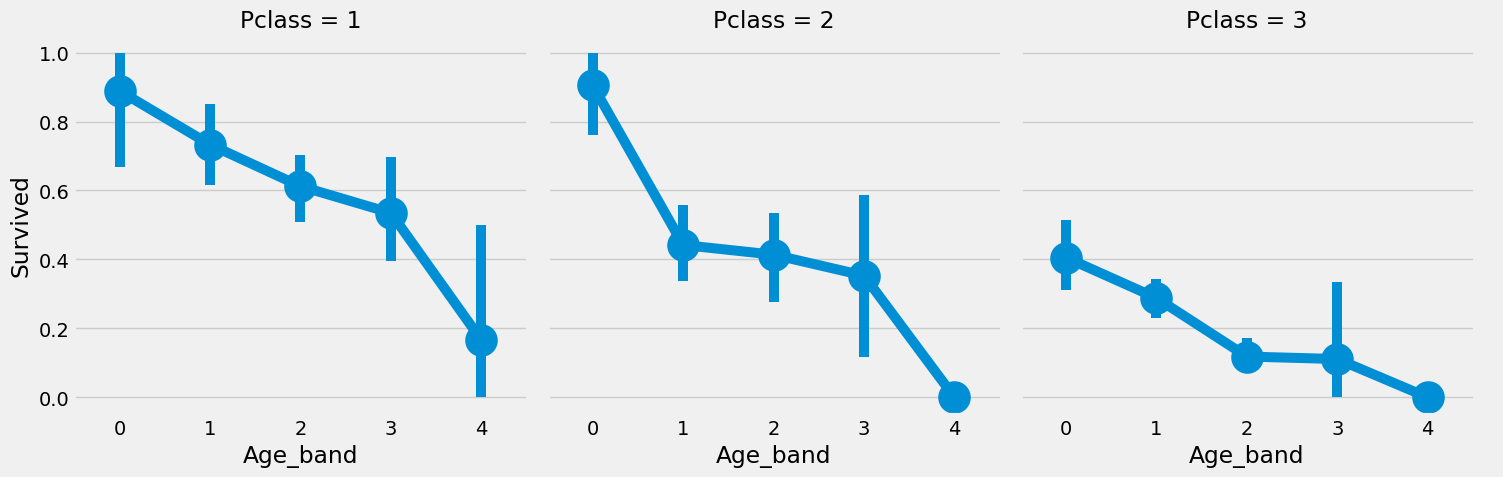

In [ ]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

Pclass와 무관하게 나이가 많을수록 생존률이 낮아진다는 것을 다시 한 번 확인할 수 있다.

### Family_Size and Alone

Parch와 SibSp을 더해 Family size라는 변수를 만들어주고, Family size가 0인지 아닌지에 따라 Alone 변수에 값을 할당해준다.

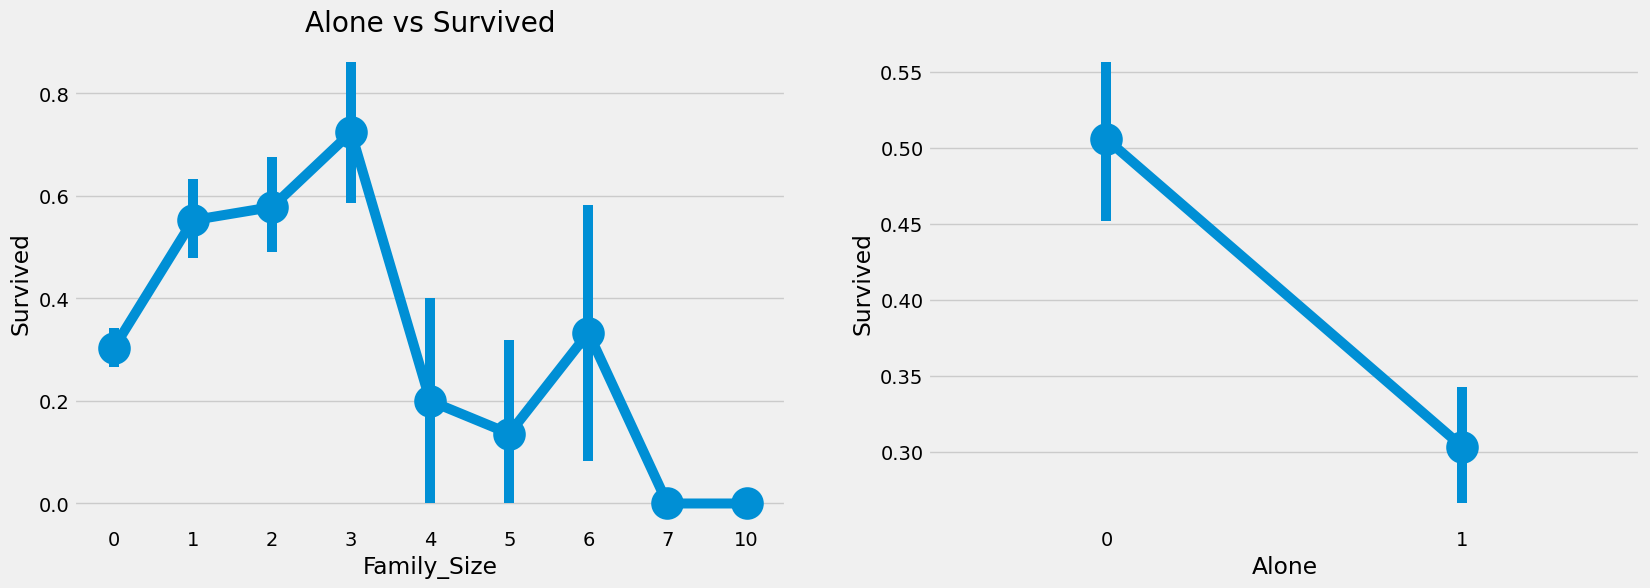

In [ ]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone']=1

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[0].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size가 0, 즉 승객이 혼자일 때 생존할 확률이 현저히 낮아진다. 가족 구성원의 수가 4 이상이 될 경우에도 생존률이 낮아진다.

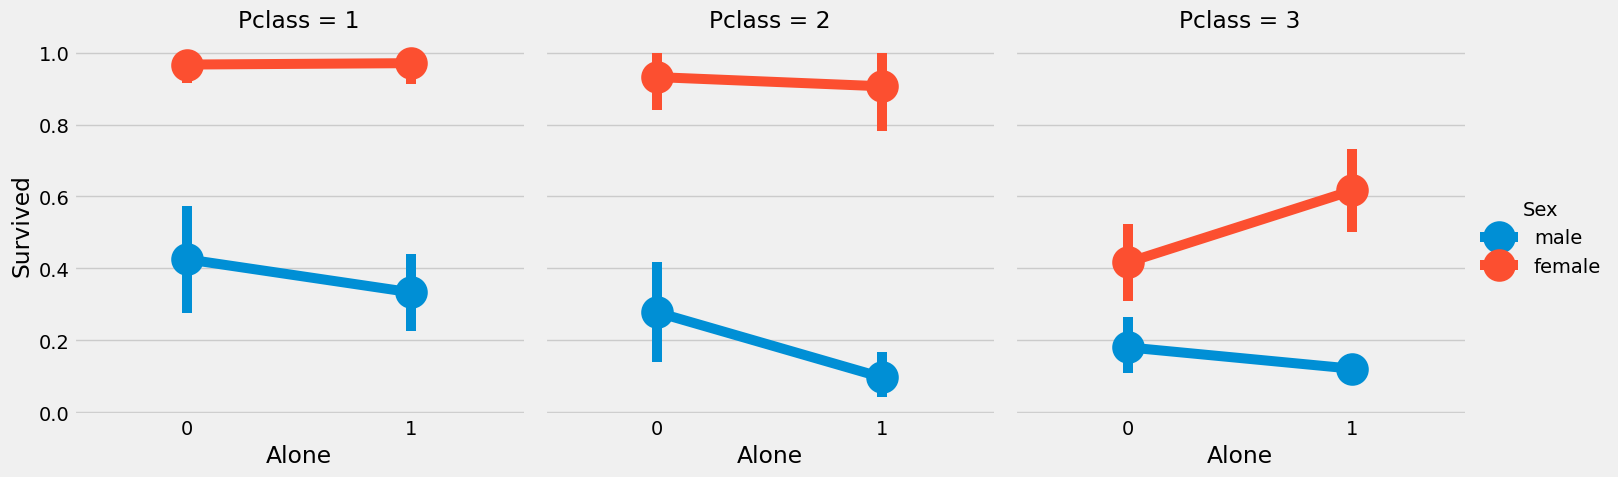

In [ ]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

Pclass3의 혼자인 여성들이 그렇지 않은 여성보다 생존률이 높다는 점만 제외하면, Pclass와 성별과 관계없이 혼자인 사람들이 생존하기 더 어려웠음을 확인할 수 있다.

### Fare_Range

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)    #Fare를 기준으로 4분위로 데이터 나눔.
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


운임의 범위대가 높아질 수록 생존률도 높아진다. Age_Band와 마찬가지로 연속형 변수 Fare를 Fare_cat으로 바꾸어준다.

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31.0), 'Fare_cat'] = 2
data.loc[data['Fare']>31.0, 'Fare_cat'] = 3

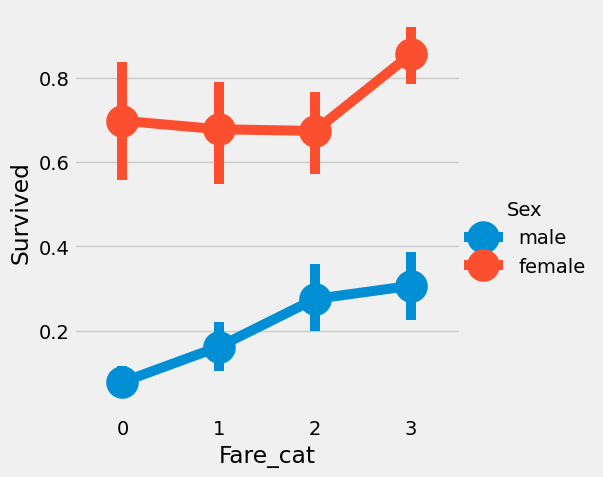

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')

Fare_cat이 높아질수록 생존률이 높아진다.

## 2.2. Converting String Values into Numeric

In [ ]:
data['Sex'].replace(['male', 'female'],[0,1],inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


**이렇게 카테고리로 바꾸어주면 Ordinal로 처리돼서 안되지 않나? Dummy Variable로 처리해줘야 하는 것 아닌가?**

## 2.3. Dropping UnNeeded Features

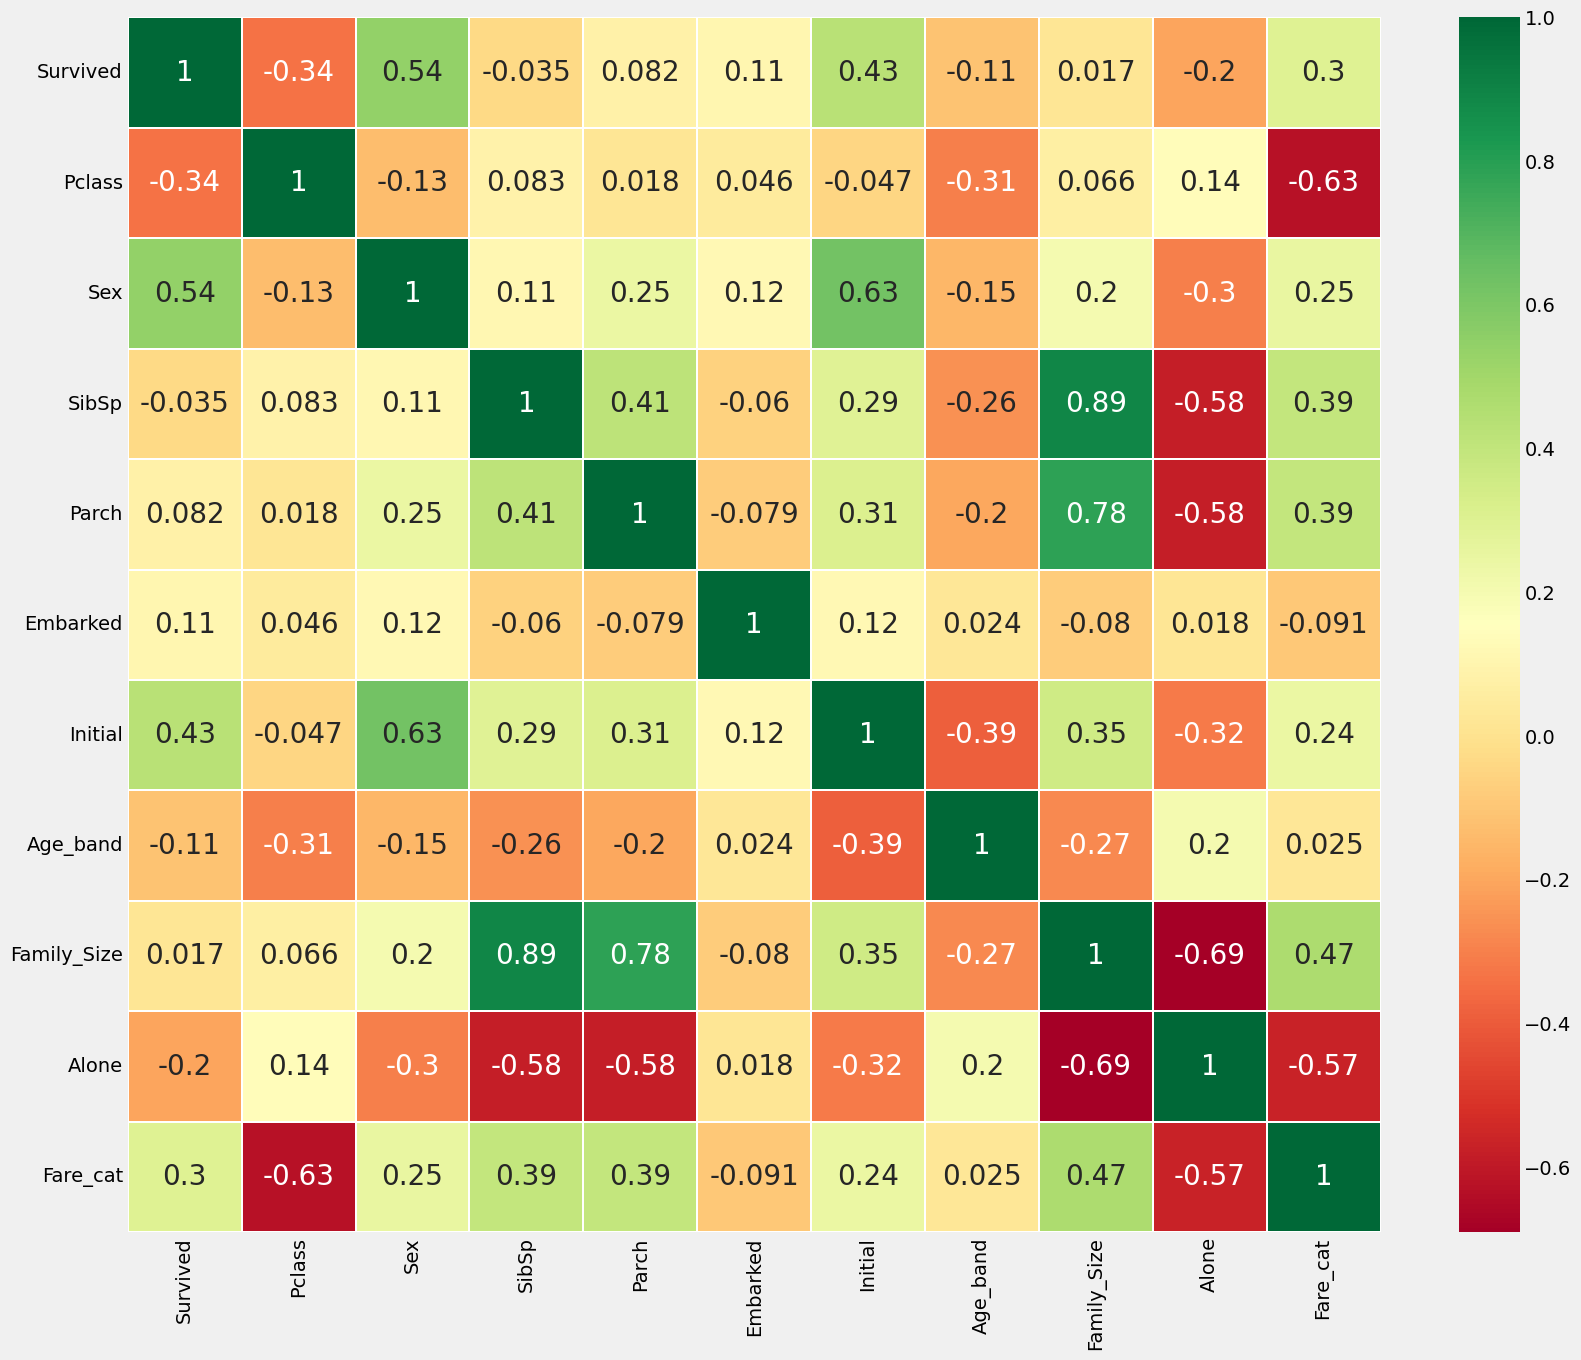

In [ ]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp와 Family_Size, Parch와 Family_Size가 강한 양의 상관관계를 가지고, Family_Size와 Alone이 강한 음의 상관관계를 갖는다.

# Part 3: Predictive Modeling

In [ ]:
# import ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived']) #stratify로 타겟값 입력 시 train과 test 간의 calss 비율을 일정하게 유지.
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 3.1. Radial Support Vector Machines (rbf-SVM)

In [ ]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


## 3.2. Linear Support Vector Machines (linear-SVM)

In [ ]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


## 3.3. Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is 0.8134328358208955


## 3.4. Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is 0.8059701492537313


## 3.5. K-Nearest Neighbours(KNN)

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for K-Nearest Neighbours is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for K-Nearest Neighbours is 0.8134328358208955


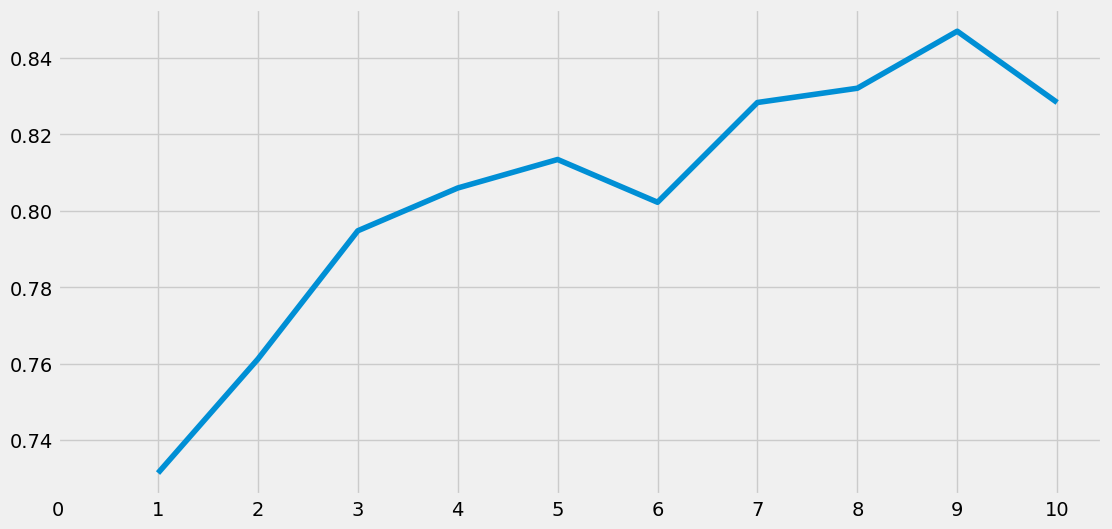

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [ ]:
# Optimal n_neighbours value 찾기 (default:5)
a_index = list(range(1,11))
a = pd.Series()
x = list(range(0,11))
for i in a_index:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

## 3.6. Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy for NaiveBayes is 0.8134328358208955


## 3.7. Random Forests

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction7, test_Y))

Accuracy for Random Forests is 0.8134328358208955


## Cross Validation

Train과 test 데이터셋에 따라 모델의 정확도가 달라질 수 있다. 이를 "model variance"라고 하는데, variance를 줄이고 더 일반적인 (generalized) 모델을 얻기 위해 Cross Validation을 수행한다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy") # kfold의 split만큼의 요소를 갖는 리스트
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

[0.7        0.76404494 0.75280899 0.82022472 0.73033708 0.76404494
 0.87640449 0.75280899 0.79775281 0.88764045]
[0.74444444 0.7752809  0.80898876 0.85393258 0.7752809  0.79775281
 0.92134831 0.83146067 0.85393258 0.92134831]
[0.73333333 0.7752809  0.80898876 0.79775281 0.75280899 0.7752809
 0.85393258 0.79775281 0.83146067 0.86516854]
[0.75555556 0.79775281 0.7752809  0.80898876 0.78651685 0.79775281
 0.86516854 0.82022472 0.79775281 0.87640449]
[0.77777778 0.84269663 0.74157303 0.80898876 0.79775281 0.73033708
 0.83146067 0.78651685 0.7752809  0.8988764 ]
[0.7        0.78651685 0.75280899 0.78651685 0.76404494 0.75280899
 0.86516854 0.82022472 0.84269663 0.88764045]
[0.76666667 0.84269663 0.75280899 0.7752809  0.78651685 0.82022472
 0.88764045 0.84269663 0.78651685 0.88764045]


,CV Mean,Std
Linear SVM,0.784607,0.057841
Radial SVM,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.799126,0.047139
Naive Bayes,0.795843,0.054861
Random Forest,0.814869,0.046388


<Axes: >

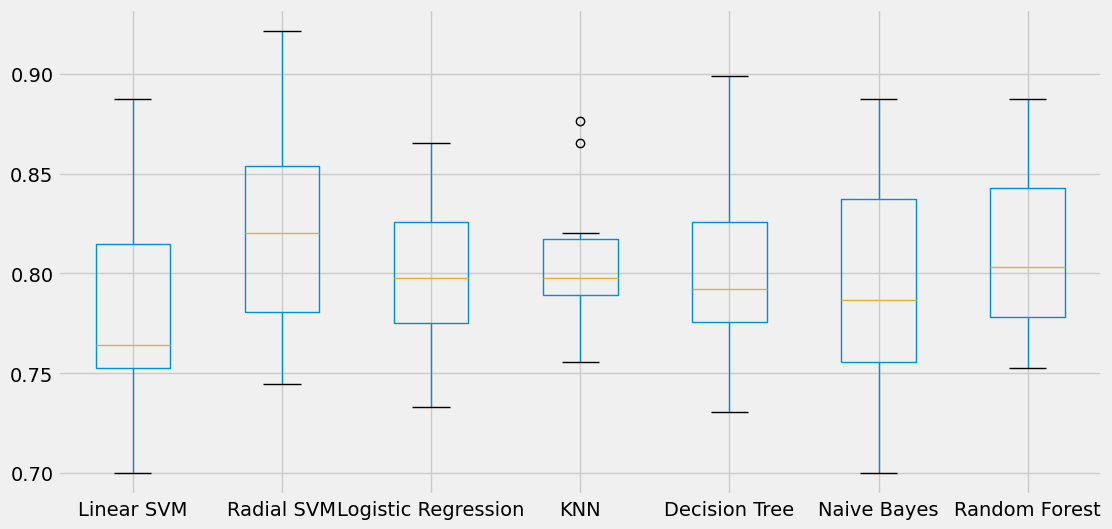

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

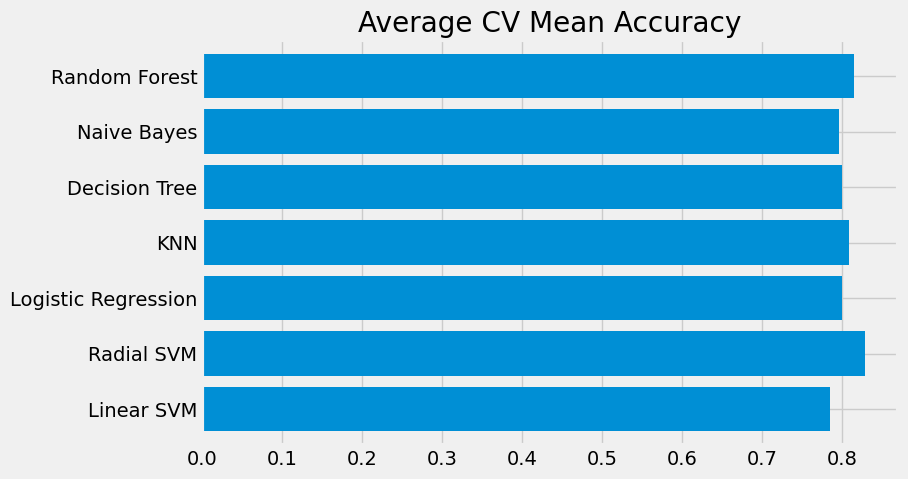

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

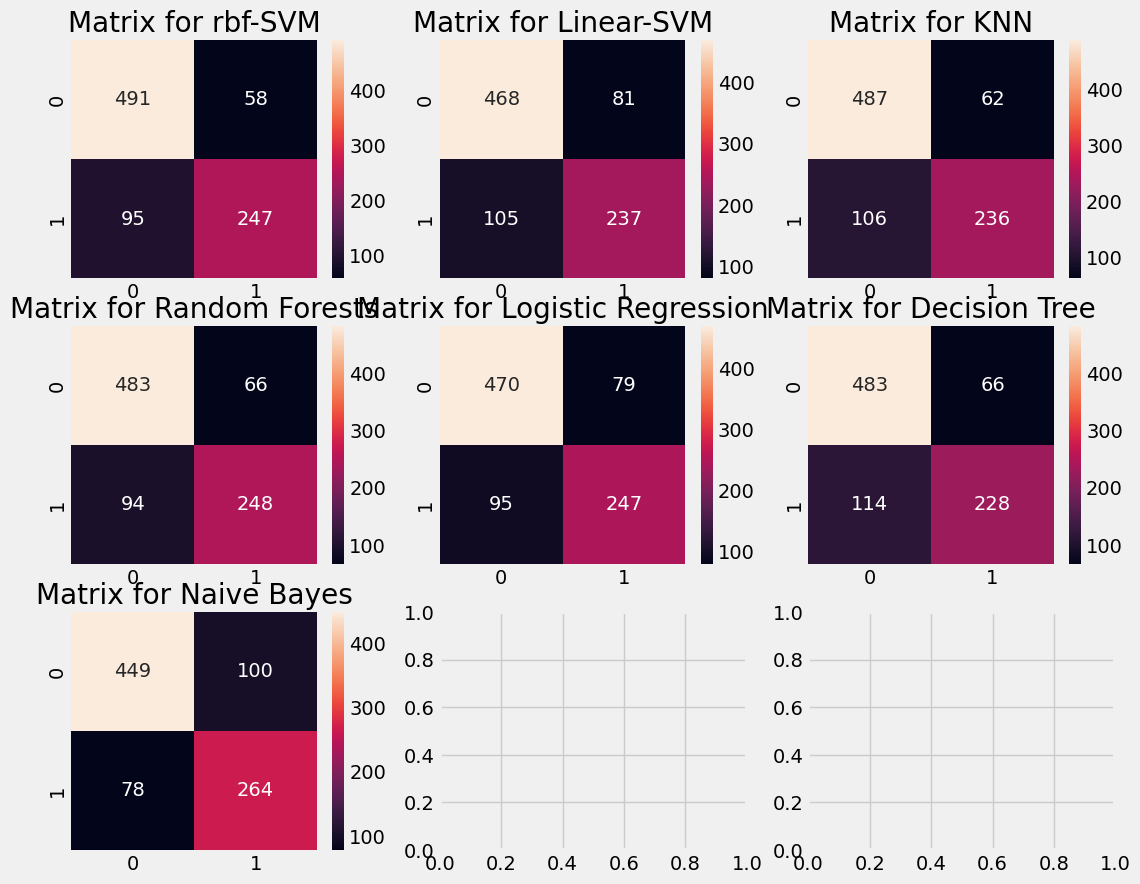

In [ ]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


## Hyper-Parameter Tuning

### SVM

- **C**: 이상치(오류)를 얼마나 허용할 것인지에 대한 hyperparameter. 클수록 hard-magin에 가까워지고 (이상치를 허용하지 않음.), 작아질수록 soft-margin에 가까워진다. ()
- **gamma**: 결정 경계를 얼마나 유연하게 그릴 것인지에 대한 hyperparameter. 클수록 학습데이터에 맞게 구불구불한 경계를 그리고, 작아질수록 직선에 가까운 직선을 긋게 된다.
- **kernel**: 결정 경계의 형태(모양)을 결정 -> rbf, linear 등

In [ ]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

- n_estimators: 생성할 트리의 개수

In [ ]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
 ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
 ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
 ('LR', LogisticRegression(C=0.05)),
 ('DT', DecisionTreeClassifier(random_state=0)),
 ('NB', GaussianNB()),
 ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross=cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging

Voting Classifier와는 다르게 Bagging은 유사한 classifier를 이용한다.

In [ ]:
# Bagged KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [ ]:
# Bagged Decision Tree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

In [ ]:
# AdaBoost, base_estimator ; Decision Tree
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The corss validated score for AdaBoost is:', result.mean())

The corss validated score for AdaBoost is: 0.8249188514357055


In [ ]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The corss validated score for Gradient Boosting is:', result.mean())

The corss validated score for Gradient Boosting is: 0.8115230961298376


In [ ]:
# XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The corss validated score for XGBoost is:', result.mean())

The corss validated score for XGBoost is: 0.8160299625468165


In [ ]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


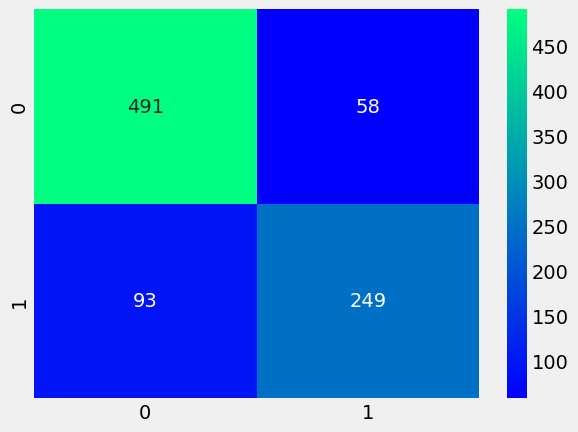

In [ ]:
# Confusion Matrix
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

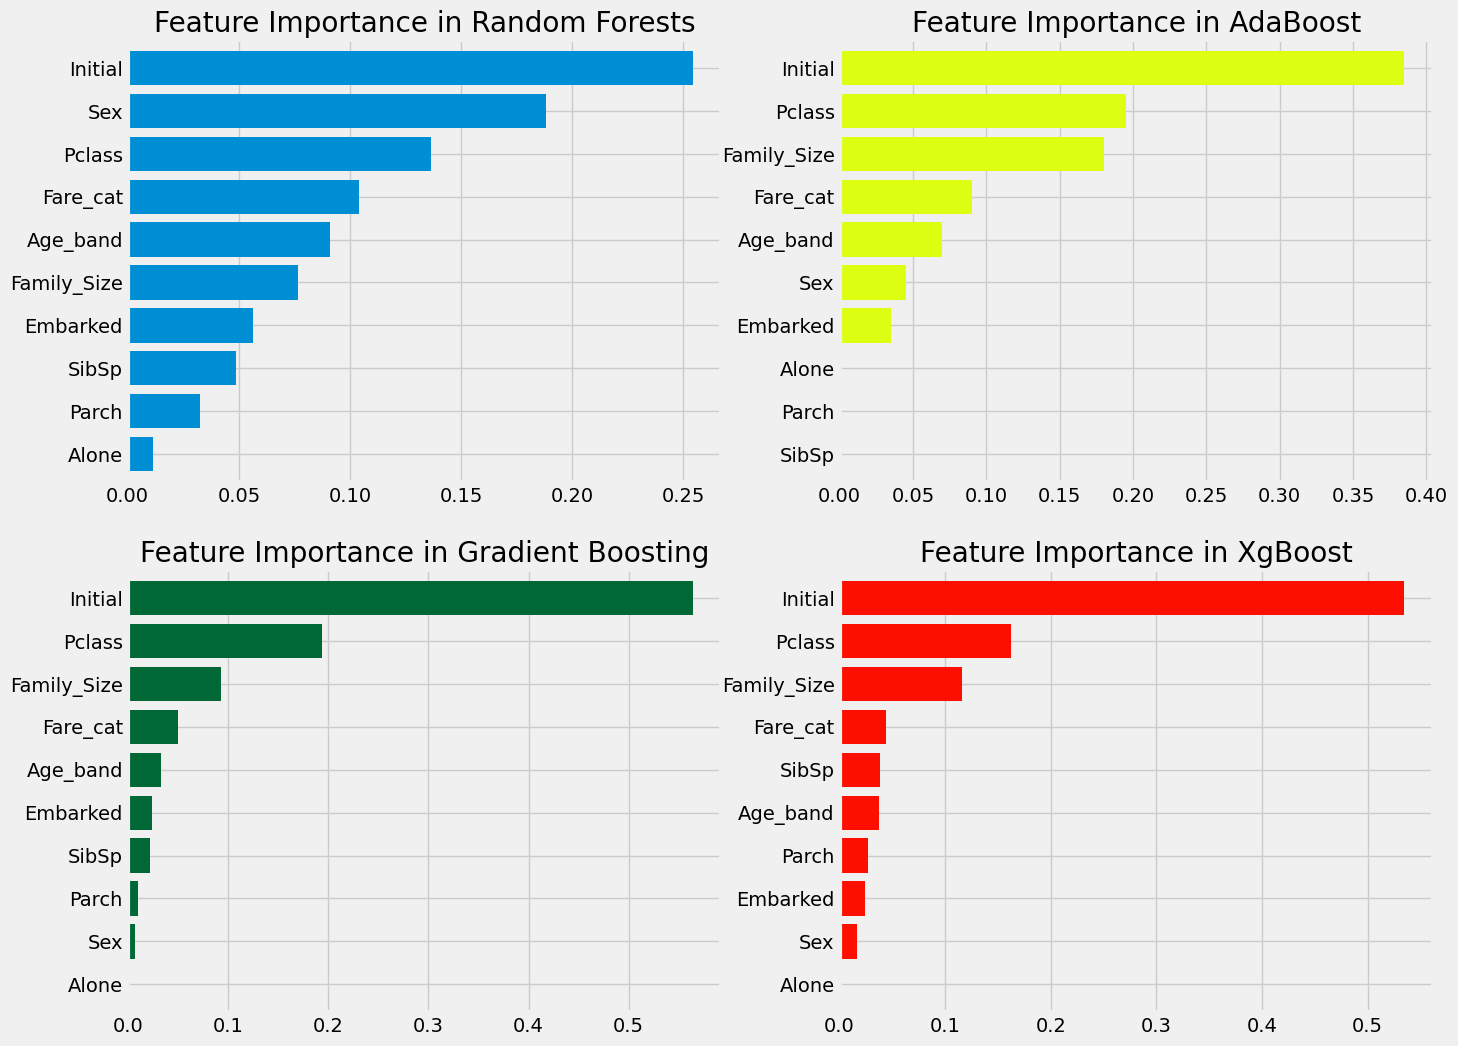

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15,12))
model = RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()